<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX Falcon 9 First Stage Landing Prediction**


## Hands-on Lab: Complete the EDA using pandas and data visualization


In this task, we will predict whether the Falcon 9 first stage will land successfully. SpaceX advertises on its website that the Falcon 9 rocket will cost $62 million to launch; other providers cost over $165 million each. Much of the savings is due to SpaceX's ability to reuse the first stage.

In this lab, we will perform exploratory data analysis and feature engineering.


The first stage of the Falcon 9 will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Below are several examples of failed landings:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most failed landings are planned. SpaceX makes a controlled landing in the oceans.


## Objectives
Perform exploratory data analysis and feature engineering with Pandas and Matplotlib

- Exploratory data analysis
- Preparation for data feature engineering

----


### We import libraries and define auxiliary functions

## ``E``xploratory ``D``ata ``A``nalysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's look at how the variables `FlightNumber` (which indicates continuous launch attempts) and `Payload` would affect the launch outcome.

We can plot the value of <code>FlightNumber</code> against <code>PayloadMass</code> and overlay the launch outcome. We observe that as the flight number increases, the first stage becomes more likely to land successfully. The payload mass is also important; it appears that the larger the payload, the lower the probability of the first stage returning.

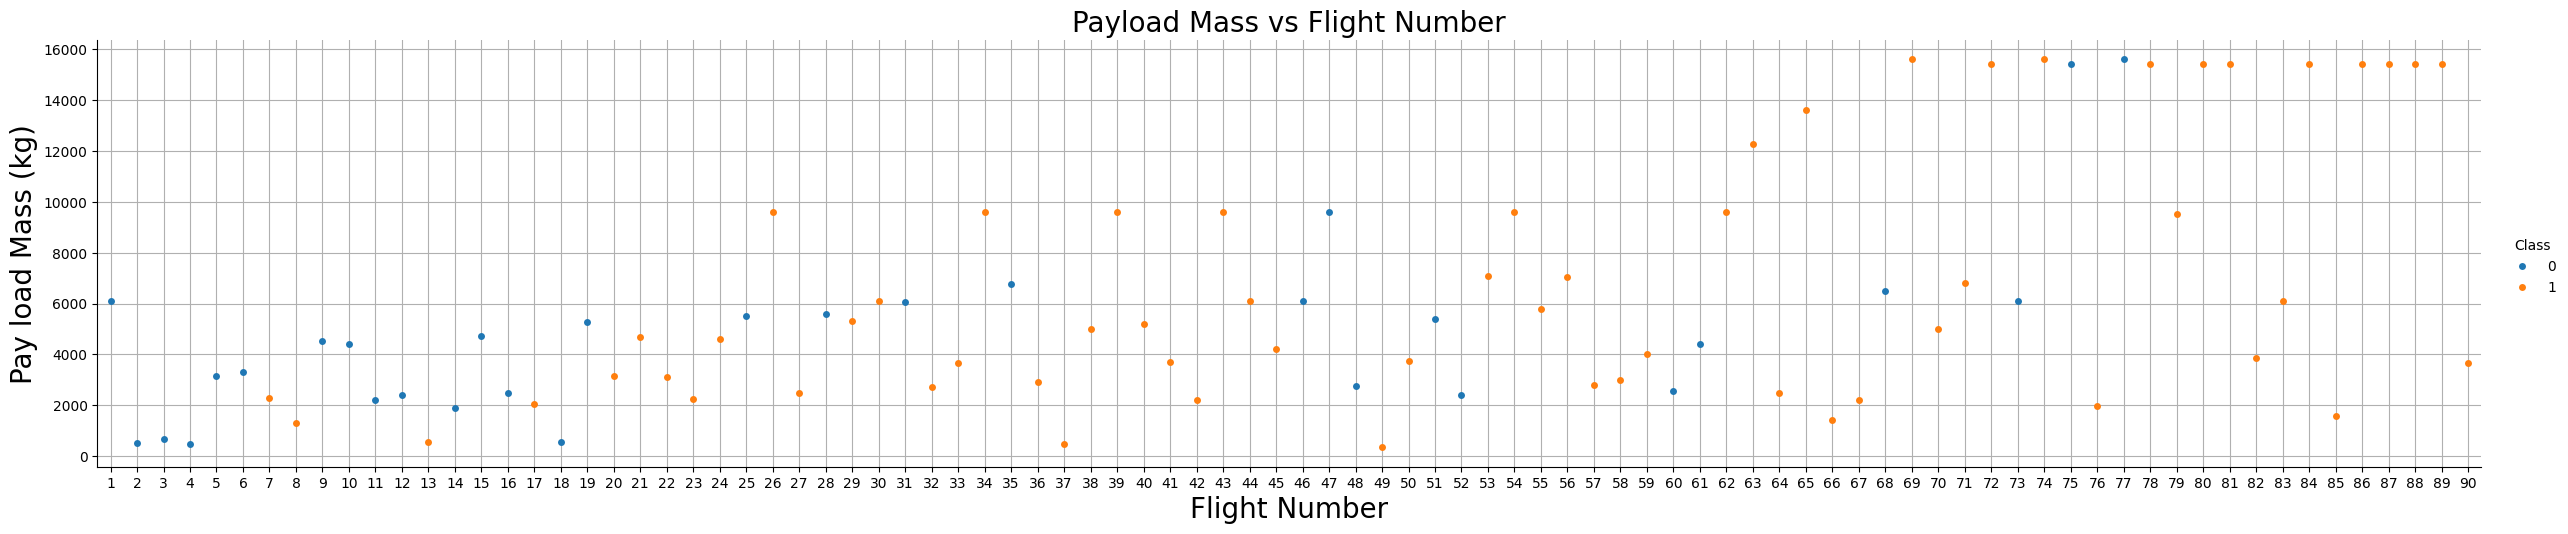

In [19]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.title("Payload Mass vs Flight Number",fontsize=20)
plt.grid()
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's take a deeper look at each site to view their detailed launch logs.

### TASK 1: We will visualize the relationship between the flight number and the launch site


Use the <code>catplot</code> function to plot <code>FlightNumber</code> against <code>LaunchSite</code>, set the <code>x</code> parameter to <code>FlightNumber</code>, set <code>y</code> to <code>Launch Site</code>, and set the <code>hue</code> parameter to <code>'class'</code>.


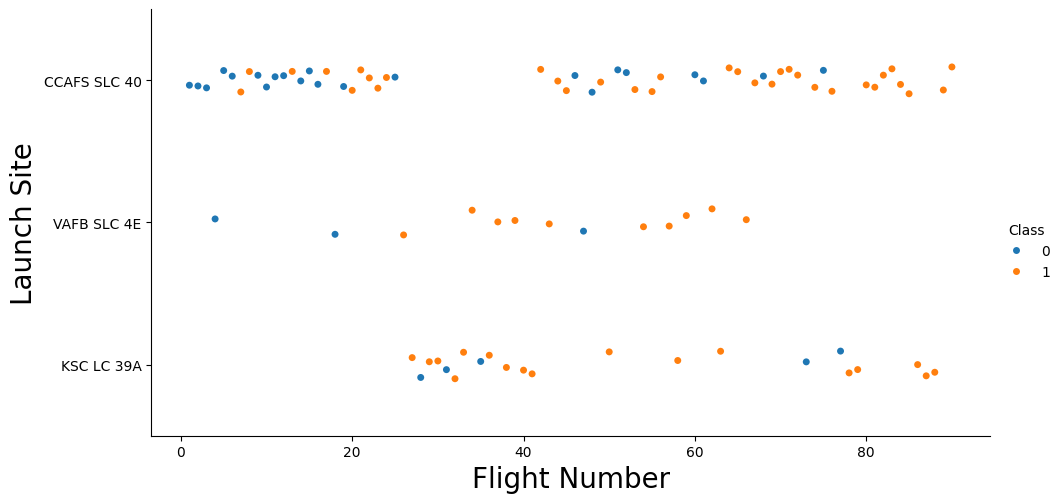

In [20]:
# Draw a scatter plot with the x-axis as the flight number, the y-axis as the launch site, and the pitch as the class value.
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can now explain the patterns we find in the scatter plots of Flight Number versus Launch Location.

We can conclude that: ``As the flight number increases, so does the probability of success in the first stage returning successfully to the ground.``

### TASK 2: We will visualize the relationship between the payload and the launch site


We also want to see if there is any relationship between launch sites and their payload mass.

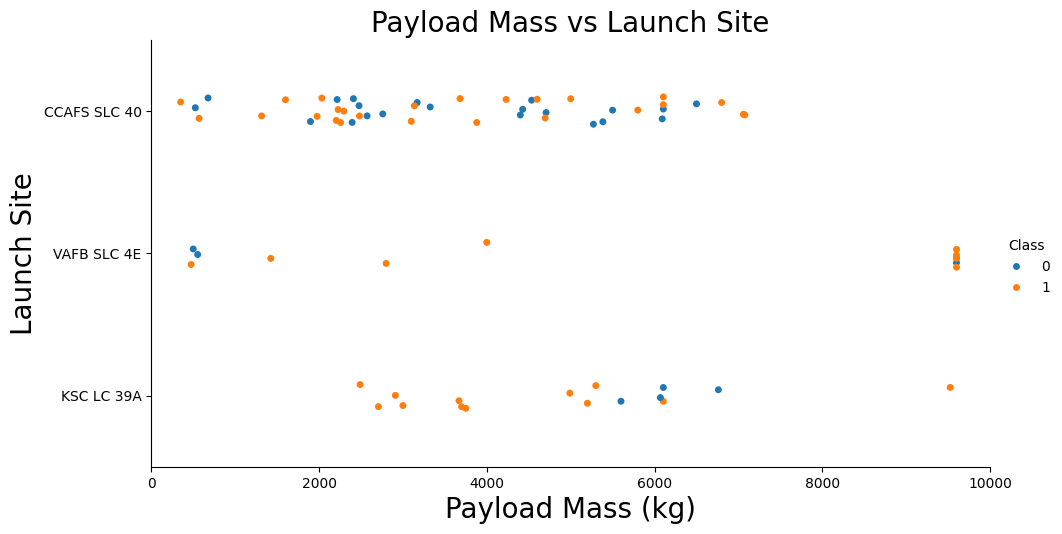

In [21]:
# Let's draw a scatter plot with the x-axis as payload mass (kg), the y-axis as launch site, and pitch as class value.
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect = 2)
plt.title("Payload Mass vs Launch Site",fontsize=20)
plt.xlim(0, 10000)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now, if we look at the payload scatter plot versus launch site, we find that no rockets with a heavy payload mass (greater than ``10,000``) were launched from the VAFB-SLC launch site.

### TASK 3: We will visualize the relationship between success rate and orbit type


Next, we want to visually check whether there is any relationship between success rate and orbit type.


We will create a ``bar_chart`` for the success rate of each orbit.


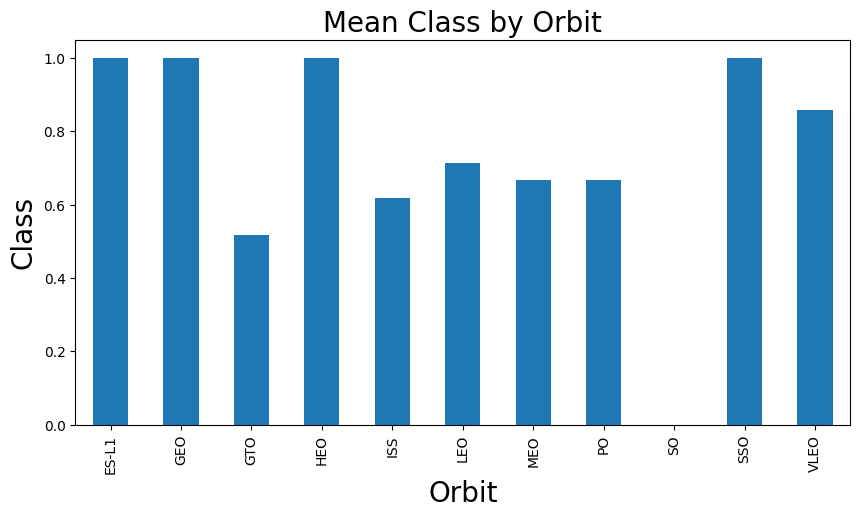

In [7]:
# We will use the groupby method to calculate the class mean for each orbit type.
df.groupby('Orbit')['Class'].mean().plot(kind='bar', figsize=(10, 5))
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Class",fontsize=20)
plt.title("Mean Class by Orbit",fontsize=20)
plt.show()


Analizando el gráfico de barras trazado podemos ver que los lanzamientos con mas tasa de exito son los lanzados a las orbitas:
 * ES-L1
 * GEO
 * HEO
 * SSO


### TASK 4: We will visualize the relationship between the flight number and the orbit type


For each orbit, we want to see if there is any relationship between the flight number and the orbit type.


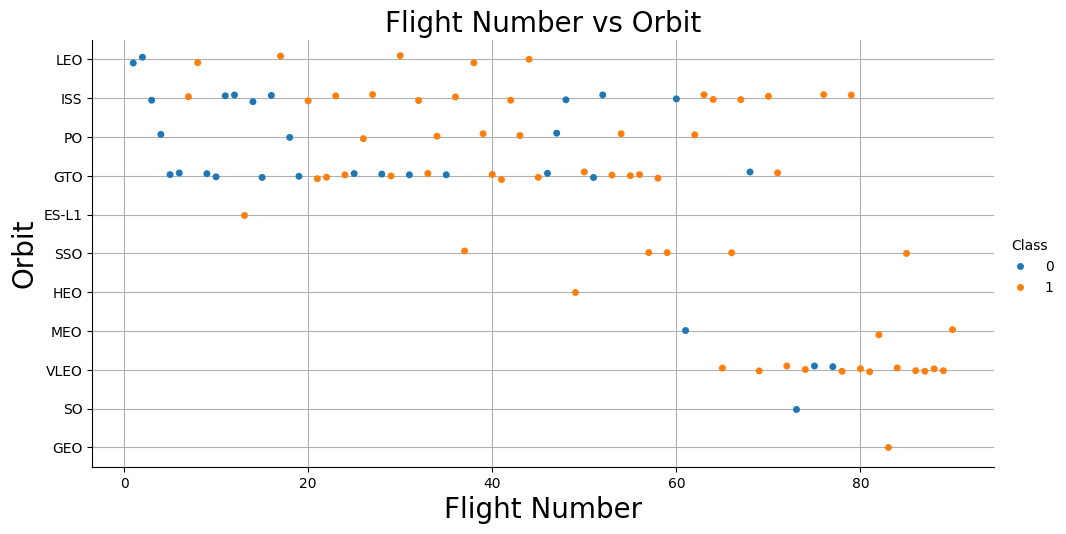

In [12]:
# We will draw a scatter plot with the x-axis as FlightNumber and the y-axis as the orbit, and the pitch as the class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect = 2)
plt.title("Flight Number vs Orbit",fontsize=20)
plt.grid()
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We should be able to see that in LEO orbit, success appears to be related to the number of flights; on the other hand, there doesn't seem to be any relationship between the number of flights when in GTO orbit.

### TASK 5: We will visualize the relationship between payload and orbit type

Similarly, we can plot the payload vs. orbit scatter plots to reveal the relationship between payload and orbit type.


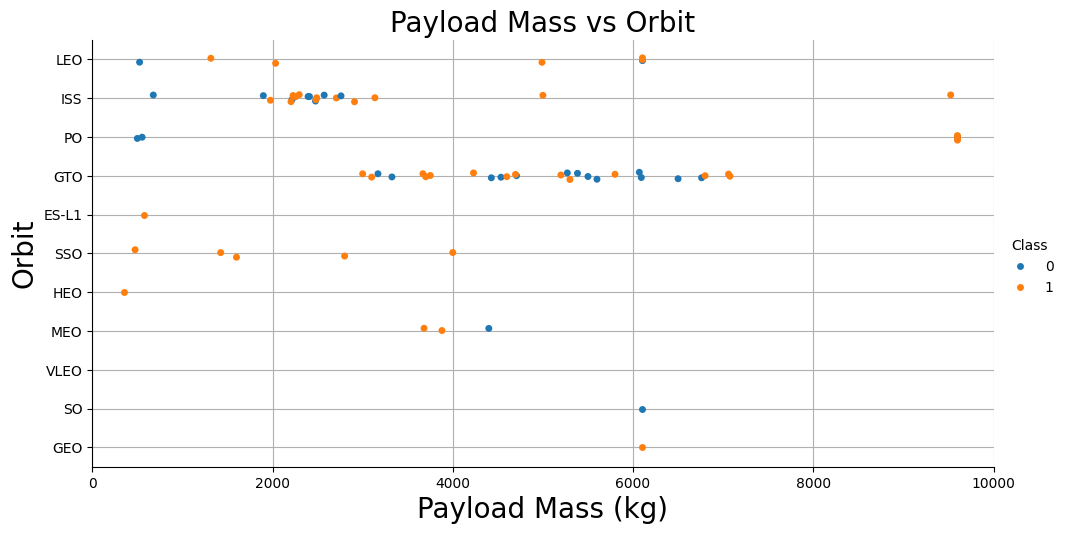

In [23]:
# We draw a scatter plot with the x-axis as payload, the y-axis as orbit, and the pitch as class value.
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect = 2)
plt.title("Payload Mass vs Orbit",fontsize=20)
plt.grid()
plt.xlim(0, 10000)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads, the successful or positive landing rate is higher for the Polar, LEO, and ISS missions.

However, for GTO, we cannot distinguish this precisely, as both the positive and negative landing rates (mission failures) are presented here.



### TASK 6: We will visualize the annual trend of launch success


We can plot a line chart with x-axis as Year and y-axis as Average Success Rate to get the trend of average launch success.


We define the ``Extract_year()`` function to obtain the year from the date:

In [24]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


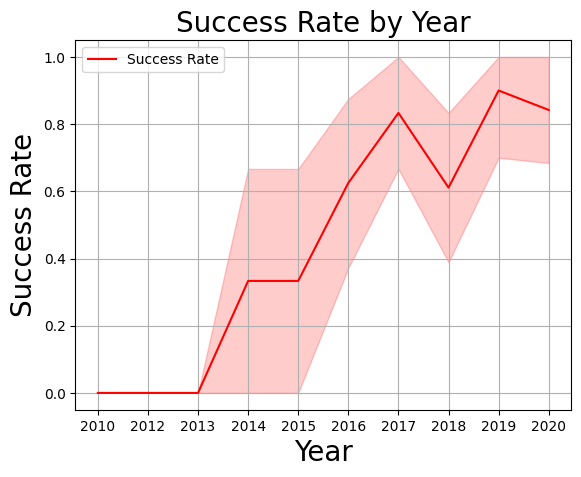

In [25]:
# We draw a line graph with the x-axis as the year extracted and the y-axis as the success rate
sns.lineplot(x=Extract_year(df["Date"]), y=df["Class"], color="red", label="Success Rate")
plt.title("Success Rate by Year",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.grid()
plt.show()


It can be seen that the success rate from 2013 continued to increase until 2017 (stable in 2014) and after 2015 it began to increase.


## Features Engineering 


At this point, we should have some preliminary ideas about how each important variable would affect the success rate; next, we'll select the features to use in predicting success in the future module.


In [26]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK 7: We will create dummy variables for the categorical columns


We'll use the <code>get_dummies</code> function and the <code>features</code> dataframe to apply OneHotEncoder to the <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code> columns. We'll assign a value to the <code>features_one_hot</code> variable and display the results using the head method. The results dataframe will include all features, including encoded ones.


In [27]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

In [28]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK 8: We will convert all numeric columns to `float64`


Now that our <code>features_one_hot</code> data frame only contains numbers, convert the entire data frame to the <code>float64</code> variable type.

In [29]:
features_one_hot = features_one_hot.astype(float)

In [30]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

Now we can export it to a <b>CSV</b> for the next section.

In [31]:
features_one_hot.to_csv('dataset_part_3.csv', index=True)

<br>

--------

<br>

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
